In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
from sys import path
path.insert(0,'../src/')
from glob import glob

from chemulator import Chemulator

---

### Let's work with the top-ten elements in the dataset. And do its benchmarking

We have 10 different models in the dataset and we can choose the 10 with the highest temperature for each model.


In [2]:
#first, to define the path of the emulator and the encoder
autoencoder_dir="../models/autoencoder-2021-release/"
emulator=Chemulator(autoencoder_dir=autoencoder_dir)
emulator.load_model("../models/emulator-2021-release/")

In [3]:
data=pd.read_hdf("example_models.hdf",key="df").reset_index(drop=True)
#data=data.drop_duplicates('gas_temp').sort_values(by=['gas_temp']) #we sort the values by the gas temperature
data=data.drop_duplicates('gas_temp')

In [4]:
tops=[]
for model in data['model'].unique():
    top=data[data['model']==model]
    tops.append(top.sort_values(by=['gas_temp'])[-10:])
#In tops we have the list of the top-10 elements of each model sorted by temperature of the gas

In [5]:
# Now we have to sorted in time order
models_top=[] #esta lista tendra los valores de cada modelo con mayor temperatura
for top in tops:
    models_top.append(top.sort_values(by=['Time'],ascending=True))    
models_top[9]

,model,Time,gas_density,gas_temp,dust_temp,av,radfield,zeta,H,H+,...,MG+,CO+,CO,HCO+,O2,O2+,E-,coldens,h2col,ccol
9005,4951,4000.0,989240.0,101.19,15.02,0.000182,3.222924,1.917344,0.044247,1.050210e-09,...,0.000008,4.953790e-15,0.000010,2.111720e-12,4.834630e-11,4.845780e-16,0.000030,2.892011e+17,8.560156e+14,18560.378653
9006,4951,5000.0,989240.0,101.04,15.02,0.000182,3.222924,1.917344,0.044201,1.032430e-09,...,0.000008,4.844050e-15,0.000012,2.108210e-12,4.934560e-11,5.043260e-16,0.000030,2.892011e+17,8.560156e+14,18560.378653
9007,4951,6000.0,989240.0,101.09,15.02,0.000182,3.222924,1.917344,0.044210,1.034700e-09,...,0.000008,4.755360e-15,0.000014,2.091050e-12,5.072030e-11,5.262240e-16,0.000029,2.892011e+17,8.560156e+14,18560.378653
9011,4951,10000.0,989240.0,101.39,15.02,0.000182,3.222924,1.917344,0.044264,1.055220e-09,...,0.000008,4.469260e-15,0.000019,2.030800e-12,5.677380e-11,6.235740e-16,0.000026,2.892011e+17,8.560156e+14,18560.378653
9017,4951,16000.0,989240.0,101.10,15.02,0.000182,3.222924,1.917344,0.044246,1.057200e-09,...,0.000008,4.153660e-15,0.000025,1.990310e-12,6.594090e-11,7.866030e-16,0.000024,2.892011e+17,8.560156e+14,18560.378653
9022,4951,21000.0,989240.0,101.57,15.02,0.000182,3.222924,1.917344,0.044242,1.061940e-09,...,0.000008,3.971860e-15,0.000028,1.966040e-12,7.370070e-11,9.300030e-16,0.000022,2.892011e+17,8.560156e+14,18560.378653
9026,4951,25000.0,989240.0,101.63,15.02,0.000182,3.222924,1.917344,0.044246,1.066850e-09,...,0.000008,3.862970e-15,0.000030,1.950000e-12,7.967540e-11,1.043150e-15,0.000021,2.892011e+17,8.560156e+14,18560.378653
9044,4951,43000.0,989240.0,101.20,15.02,0.000182,3.222924,1.917344,0.044202,1.059110e-09,...,0.000008,3.590130e-15,0.000035,1.923370e-12,9.939230e-11,1.444310e-15,0.000019,2.892011e+17,8.560156e+14,18560.378653
9099,4951,98000.0,989240.0,101.33,15.02,0.000182,3.222924,1.917344,0.044228,1.069700e-09,...,0.000008,3.461180e-15,0.000037,1.896010e-12,1.140320e-10,1.748350e-15,0.000018,2.892011e+17,8.560156e+14,18560.378653
9746,4951,745000.0,989240.0,101.13,15.02,0.000182,3.222924,1.917344,0.044241,1.074060e-09,...,0.000008,3.457970e-15,0.000037,1.892020e-12,1.147910e-10,1.762060e-15,0.000018,2.892011e+17,8.560156e+14,18560.378653


**Now for the benchmarking we run the chem for every initial condition.**

Notice that, in each model we have differents timesteps. We will evaluate over all the points between the initial and ending points. Then we take those corresponding to each value. 

Now, let's prepare the initial condition and the number of steps: 

In [11]:
index=[0,1000,2001,3873,4001,5002,6992,7002,8003,9005]

---
---

In [7]:
#The initial conditions are the first values of every model:
init_cond=[]
steps=[]
n=0
for i in models_top:
    init_cond.append(i.loc[index[n]:index[n]])
    paso=[]
    n=n+1
    for k in range(9):
        paso.append((i['Time'].iloc[k+1]-i['Time'].iloc[k])/1000.0) #- 1)
    steps.append(paso)
    
#init_cond contine la informacion de cada una de las condiciones iniciales de cada modelo
#steps tiene los valores en los que tenemos que evaluar el modelo para 'atinarle' a los valores que elegimos 
#por tener las temperaturas mas altas

In [8]:
#We prepare the initial conditions
init_cond2=[]
for cond in init_cond:
    init_cond2.append(emulator.prepare_inputs(cond.reset_index(drop=True),learn_scaling=False)
    )

1/1 [==============================] - 0s 20ms/step


In [9]:
predictions=[]
n=0
for k in range(len(init_cond2)):
    pred=pd.DataFrame() #The empty dataFrame to fill it up with the prediction o each model
    for paso in steps[n]:
        print(init_cond[k])#prueba
        pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
        init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
        init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
    predictions.append(pred)
    n=n+1

  model    Time  gas_density  gas_temp dust_temp            av  radfield  \
0  6939  1000.0       2548.6     71.53      10.0  2.455700e-21  0.870462   

      zeta         H            H+  ...       MG+           CO+            CO  \
0  2.25372  0.082356  1.691810e-08  ...  0.000044  3.584520e-13  1.805500e-07   

           HCO+            O2           O2+        E-   coldens         h2col  \
0  1.256760e-11  1.660070e-10  1.430850e-14  0.000274  3.904811  5.069267e-08   

           ccol  
0  1.109323e-07  

[1 rows x 45 columns]
1/1 [==============================] - 0s 21ms/step
  model    Time  gas_density  gas_temp dust_temp            av  radfield  \
0  6939  1000.0       2548.6  0.306292      10.0  2.455700e-21  0.870462   

      zeta         H            H+  ...         h2col          ccol    Chem_1  \
0  2.25372  0.082356  1.691810e-08  ...  5.069267e-08  1.109323e-07  0.091001   

     Chem_2    Chem_3    Chem_4    Chem_5    Chem_6    Chem_7    Chem_8  
0  0.205298  0.19718

/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 23ms/step
  model    Time  gas_density  gas_temp dust_temp            av  radfield  \
0  6939  1000.0       2548.6  0.306292      10.0  2.455700e-21  0.870462   

      zeta         H            H+  ...         h2col          ccol    Chem_1  \
0  2.25372  0.082356  1.691810e-08  ...  5.069267e-08  1.109323e-07  0.091001   

     Chem_2    Chem_3    Chem_4    Chem_5    Chem_6    Chem_7    Chem_8  
0  0.205298  0.197181  0.260715  0.543586  0.031379  0.115723  0.445522  

[1 rows x 53 columns]


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 22ms/step
  model    Time  gas_density  gas_temp dust_temp            av  radfield  \
0  6939  1000.0       2548.6  0.306292      10.0  2.455700e-21  0.870462   

      zeta         H            H+  ...         h2col          ccol    Chem_1  \
0  2.25372  0.082356  1.691810e-08  ...  5.069267e-08  1.109323e-07  0.091001   

     Chem_2    Chem_3    Chem_4    Chem_5    Chem_6    Chem_7    Chem_8  
0  0.205298  0.197181  0.260715  0.543586  0.031379  0.115723  0.445522  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 22ms/step
  model    Time  gas_density  gas_temp dust_temp            av  radfield  \
0  6939  1000.0       2548.6  0.306292      10.0  2.455700e-21  0.870462   

      zeta         H            H+  ...         h2col          ccol    Chem_1  \
0  2.25372  0.082356  1.691810e-08  ...  5.069267e-08  1.109323e-07  0.091001   

     Chem_2    Chem_3    Chem_4    Chem_5    Chem_6    Chem_7    Chem_8  
0  0.205298  0.197181  0.260715  0.543586  0.031379  0.115723  0.445522  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 23ms/step
  model    Time  gas_density  gas_temp dust_temp            av  radfield  \
0  6939  1000.0       2548.6  0.306292      10.0  2.455700e-21  0.870462   

      zeta         H            H+  ...         h2col          ccol    Chem_1  \
0  2.25372  0.082356  1.691810e-08  ...  5.069267e-08  1.109323e-07  0.091001   

     Chem_2    Chem_3    Chem_4    Chem_5    Chem_6    Chem_7    Chem_8  
0  0.205298  0.197181  0.260715  0.543586  0.031379  0.115723  0.445522  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step
  model    Time  gas_density  gas_temp dust_temp            av  radfield  \
0  6939  1000.0       2548.6  0.306292      10.0  2.455700e-21  0.870462   

      zeta         H            H+  ...         h2col          ccol    Chem_1  \
0  2.25372  0.082356  1.691810e-08  ...  5.069267e-08  1.109323e-07  0.091001   

     Chem_2    Chem_3    Chem_4    Chem_5    Chem_6    Chem_7    Chem_8  
0  0.205298  0.1971

/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

1/1 [==============================] - 0s 22ms/step
  model    Time  gas_density  gas_temp dust_temp            av  radfield  \
0  6939  1000.0       2548.6  0.306292      10.0  2.455700e-21  0.870462   

      zeta         H            H+  ...         h2col          ccol    Chem_1  \
0  2.25372  0.082356  1.691810e-08  ...  5.069267e-08  1.109323e-07  0.091001   

     Chem_2    Chem_3    Chem_4    Chem_5    Chem_6    Chem_7    Chem_8  
0  0.205298  0.197181  0.260715  0.543586  0.031379  0.115723  0.445522  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
  model    Time  gas_density  gas_temp dust_temp            av  radfield  \
0  6939  1000.0       2548.6  0.164307      10.0  2.455700e-21  0.870462   

      zeta         H            H+  ...         h2col          ccol   Chem_1  \
0  2.25372  0.082356  1.691810e-08  ...  5.069267e-08  1.109323e-07  0.44272   

     Chem_2    Chem_3    Chem_4    Chem_5    Chem_6    Chem_7   Chem_8  
0  0.071127  0.103593  0.146888  0.077038  0.023271  0.297732  0.46836  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
1000  17604   0.0      66019.0   8404.27    109.59  0.7  36.61096  2.203208   

             H            H+  ...       MG+           CO+        CO  \
1000  0.000196  6.397570e-10  ...  0.000004  3.954590e-14  0.000449   

              HCO+       O2           O2+        E-       coldens     h2col  \
1000  1.640370e-10  0.00001  4.930580e-12  0.000004  5.011872e+06  0.000938   

          ccol  
1000  0.000004  

[1 rows x 45 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 20ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
1000  17604   0.0      66019.0       NaN    109.59  0.7  36.61096  2.203208   

             H            H+  ...     h2col      ccol  Chem_1  Chem_2  Chem_3  \
1000  0.000196  6.397570e-10  ...  0.000938  0.000004     NaN     NaN     NaN   

      Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
1000     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A v

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 24ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
1000  17604   0.0      66019.0       NaN    109.59  0.7  36.61096  2.203208   

             H            H+  ...     h2col      ccol  Chem_1  Chem_2  Chem_3  \
1000  0.000196  6.397570e-10  ...  0.000938  0.000004     NaN     NaN     NaN   

      Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
1000     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
1000  17604   0.0      66019.0       NaN    109.59  0.7  36.61096  2.203208   

             H            H+  ...     h2col      ccol  Chem_1  Chem_2  Chem_3  \
1000  0.000196  6.397570e-10  ...  0.000938  0.000004     NaN     NaN     NaN   

      Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
1000     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
1000  17604   0.0      66019.0       NaN    109.59  0.7  36.61096  2.203208   

             H            H+  ...     h2col      ccol  Chem_1  Chem_2  Chem_3  \
1000  0.000196  6.397570e-10  ...  0.000938  0.000004     NaN     NaN     NaN   

      Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
1000     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
1000  17604   0.0      66019.0       NaN    109.59  0.7  36.61096  2.203208   

             H            H+  ...     h2col      ccol  Chem_1  Chem_2  Chem_3  \
1000  0.000196  6.397570e-10  ...  0.000938  0.000004     NaN     NaN     NaN   

      Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
1000     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
1000  17604   0.0      66019.0       NaN    109.59  0.7  36.61096  2.203208   

             H            H+  ...     h2col      ccol  Chem_1  Chem_2  Chem_3  \
1000  0.000196  6.397570e-10  ...  0.000938  0.000004     NaN     NaN     NaN   

      Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
1000     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 25ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
1000  17604   0.0      66019.0       NaN    109.59  0.7  36.61096  2.203208   

             H            H+  ...     h2col      ccol  Chem_1  Chem_2  Chem_3  \
1000  0.000196  6.397570e-10  ...  0.000938  0.000004     NaN     NaN     NaN   

      Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
1000     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
1000  17604   0.0      66019.0       NaN    109.59  0.7  36.61096  2.203208   

             H            H+  ...     h2col      ccol  Chem_1  Chem_2  Chem_3  \
1000  0.000196  6.397570e-10  ...  0.000938  0.000004     NaN     NaN     NaN   

      Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
1000     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 26ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
2001  4611  1000.0    2414900.0     55.55      19.3  23.152  87.649612   

          zeta         H            H+  ...      MG+           CO+       CO  \
2001  0.033289  0.000031  1.471000e-13  ...  0.00002  1.207150e-18  0.00005   

              HCO+            O2           O2+       E-       coldens  \
2001  3.604370e-13  1.934970e-12  1.033920e-17  0.00002  3.681290e+22   

             h2col          ccol  
2001  2.161860e+21  5.435751e+17  

[1 rows x 45 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
2001  4611  1000.0    2414900.0       NaN      19.3  23.152  87.649612   

          zeta         H            H+  ...         h2col          ccol  \
2001  0.033289  0.000031  1.471000e-13  ...  2.161860e+21  5.435751e+17   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
2001     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
2001  4611  1000.0    2414900.0       NaN      19.3  23.152  87.649612   

          zeta         H            H+  ...         h2col          ccol  \
2001  0.033289  0.000031  1.471000e-13  ...  2.161860e+21  5.435751e+17   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
2001     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [=============

/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 21ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
2001  4611  1000.0    2414900.0       NaN      19.3  23.152  87.649612   

          zeta         H            H+  ...         h2col          ccol  \
2001  0.033289  0.000031  1.471000e-13  ...  2.161860e+21  5.435751e+17   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
2001     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 23ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
2001  4611  1000.0    2414900.0       NaN      19.3  23.152  87.649612   

          zeta         H            H+  ...         h2col          ccol  \
2001  0.033289  0.000031  1.471000e-13  ...  2.161860e+21  5.435751e+17   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
2001     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
2001  4611  1000.0    2414900.0       NaN      19.3  23.152  87.649612   

          zeta         H            H+  ...         h2col          ccol  \
2001  0.033289  0.000031  1.471000e-13  ...  2.161860e+21  5.435751e+17   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
2001     NaN     NaN     NaN     NaN     NaN     NaN     NaN

/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
2001  4611  1000.0    2414900.0       NaN      19.3  23.152  87.649612   

          zeta         H            H+  ...         h2col          ccol  \
2001  0.033289  0.000031  1.471000e-13  ...  2.161860e+21  5.435751e+17   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
2001     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 21ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
2001  4611  1000.0    2414900.0       NaN      19.3  23.152  87.649612   

          zeta         H            H+  ...         h2col          ccol  \
2001  0.033289  0.000031  1.471000e-13  ...  2.161860e+21  5.435751e+17   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
2001     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
2001  4611  1000.0    2414900.0       NaN      19.3  23.152  87.649612   

          zeta         H            H+  ...         h2col          ccol  \
2001  0.033289  0.000031  1.471000e-13  ...  2.161860e+21  5.435751e+17   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
2001     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

     model      Time  gas_density  gas_temp dust_temp       av   radfield  \
3873  9949  873000.0       932.18   3536.08     19.24  0.45518  42.928924   

           zeta         H        H+  ...           MG+           CO+  \
3873  228.08672  0.998265  0.001698  ...  9.268930e-07  2.263290e-15   

                CO          HCO+            O2           O2+        E-  \
3873  2.239530e-12  9.442550e-18  1.464550e-15  1.351750e-14  0.001718   

           coldens         h2col          ccol  
3873  7.237690e+20  1.205468e+11  2.046763e+12  

[1 rows x 45 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step
     model      Time  gas_density  gas_temp dust_temp       av   radfield  \
3873  9949  873000.0       932.18       NaN     19.24  0.45518  42.928924   

           zeta         H        H+  ...         h2col          ccol  Chem_1  \
3873  228.08672  0.998265  0.001698  ...  1.205468e+11  2.046763e+12     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
3873     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A v

1/1 [==============================] - 0s 22ms/step
     model      Time  gas_density  gas_temp dust_temp       av   radfield  \
3873  9949  873000.0       932.18       NaN     19.24  0.45518  42.928924   

           zeta         H        H+  ...         h2col          ccol  Chem_1  \
3873  228.08672  0.998265  0.001698  ...  1.205468e+11  2.046763e+12     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
3873     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model      Time  gas_density  gas_temp dust_temp       av   radfield  \
3873  9949  873000.0       932.18       NaN     19.24  0.45518  42.928924   

           zeta         H        H+  ...         h2col          ccol  Chem_1  \
3873  228.08672  0.998265  0.001698  ...  1.205468e+11  2.046763e+12     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
3873     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step
     model      Time  gas_density  gas_temp dust_temp       av   radfield  \
3873  9949  873000.0       932.18       NaN     19.24  0.45518  42.928924   

           zeta         H        H+  ...         h2col          ccol  Chem_1  \
3873  228.08672  0.998265  0.001698  ...  1.205468e+11  2.046763e+12     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
3873     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model      Time  gas_density  gas_temp dust_temp       av   radfield  \
3873  9949  873000.0       932.18       NaN     19.24  0.45518  42.928924   

           zeta         H        H+  ...         h2col          ccol  Chem_1  \
3873  228.08672  0.998265  0.001698  ...  1.205468e+11  2.046763e+12     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
3873     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model      Time  gas_density  gas_temp dust_temp       av   radfield  \
3873  9949  873000.0       932.18       NaN     19.24  0.45518  42.928924   

           zeta         H        H+  ...         h2col          ccol  Chem_1  \
3873  228.08672  0.998265  0.001698  ...  1.205468e+11  2.046763e+12     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
3873     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step
     model      Time  gas_density  gas_temp dust_temp       av   radfield  \
3873  9949  873000.0       932.18       NaN     19.24  0.45518  42.928924   

           zeta         H        H+  ...         h2col          ccol  Chem_1  \
3873  228.08672  0.998265  0.001698  ...  1.205468e+11  2.046763e+12     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
3873     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model      Time  gas_density  gas_temp dust_temp       av   radfield  \
3873  9949  873000.0       932.18       NaN     19.24  0.45518  42.928924   

           zeta         H        H+  ...         h2col          ccol  Chem_1  \
3873  228.08672  0.998265  0.001698  ...  1.205468e+11  2.046763e+12     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
3873     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
4001  17967   0.0       76.149   2125.69    109.52  0.7  76.39335  0.197419   

             H            H+  ...       MG+           CO+        CO  \
4001  0.964441  2.681960e-08  ...  0.000009  1.200220e-13  0.000058   

              HCO+            O2           O2+        E-       coldens  \
4001  1.985620e-10  2.550200e-10  1.067430e-12  0.000009  1.363536e+15   

             h2col        ccol  
4001  7.363169e+10  715.115576  

[1 rows x 45 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

1/1 [==============================] - 0s 21ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
4001  17967   0.0       76.149       NaN    109.52  0.7  76.39335  0.197419   

             H            H+  ...         h2col        ccol  Chem_1  Chem_2  \
4001  0.964441  2.681960e-08  ...  7.363169e+10  715.115576     NaN     NaN   

      Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
4001     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A v

      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
4001  17967   0.0       76.149       NaN    109.52  0.7  76.39335  0.197419   

             H            H+  ...         h2col        ccol  Chem_1  Chem_2  \
4001  0.964441  2.681960e-08  ...  7.363169e+10  715.115576     NaN     NaN   

      Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
4001     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
4001  17967   0.0       76.149       NaN    109.52  0.7  76.39335  0.197419   

             H            H+  ...         h2col        ccol  Chem_1  Chem_2  \
4001  0.964441  2.681960e-08  ...  7.363169e+10  715.115576     NaN     NaN   

      Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
4001     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms

/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 23ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
4001  17967   0.0       76.149       NaN    109.52  0.7  76.39335  0.197419   

             H            H+  ...         h2col        ccol  Chem_1  Chem_2  \
4001  0.964441  2.681960e-08  ...  7.363169e+10  715.115576     NaN     NaN   

      Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
4001     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 22ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
4001  17967   0.0       76.149       NaN    109.52  0.7  76.39335  0.197419   

             H            H+  ...         h2col        ccol  Chem_1  Chem_2  \
4001  0.964441  2.681960e-08  ...  7.363169e+10  715.115576     NaN     NaN   

      Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
4001     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 22ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
4001  17967   0.0       76.149       NaN    109.52  0.7  76.39335  0.197419   

             H            H+  ...         h2col        ccol  Chem_1  Chem_2  \
4001  0.964441  2.681960e-08  ...  7.363169e+10  715.115576     NaN     NaN   

      Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
4001     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
4001  17967   0.0       76.149       NaN    109.52  0.7  76.39335  0.197419   

             H            H+  ...         h2col        ccol  Chem_1  Chem_2  \
4001  0.964441  2.681960e-08  ...  7.363169e+10  715.115576     NaN     NaN   

      Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
4001     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 col

/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

1/1 [==============================] - 0s 22ms/step
      model  Time  gas_density  gas_temp dust_temp   av  radfield      zeta  \
4001  17967   0.0       76.149       NaN    109.52  0.7  76.39335  0.197419   

             H            H+  ...         h2col        ccol  Chem_1  Chem_2  \
4001  0.964441  2.681960e-08  ...  7.363169e+10  715.115576     NaN     NaN   

      Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
4001     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
5002  4674  1000.0      18685.0    5208.7     48.54  51.878  8189.3607   

         zeta         H        H+  ...       MG+           CO+            CO  \
5002  0.30318  0.999967  0.000021  ...  0.000022  1.317600e-13  2.606750e-11   

              HCO+            O2           O2+        E-       coldens  \
5002  8.240150e-16  5.797530e-14  1.048570e-12  0.000183  8.248975e+22   

             h2col          ccol  
5002  5.493718e+13  1.058395e+17  

[1 rows x 45 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
5002  4674  1000.0      18685.0       NaN     48.54  51.878  8189.3607   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
5002  0.30318  0.999967  0.000021  ...  5.493718e+13  1.058395e+17     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
5002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A v

     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
5002  4674  1000.0      18685.0       NaN     48.54  51.878  8189.3607   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
5002  0.30318  0.999967  0.000021  ...  5.493718e+13  1.058395e+17     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
5002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 24ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
5002  4674  1000.0      18685.0       NaN     48.54  51.878  8189.3607   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
5002  0.30318  0.999967  0.000021  ...  5.493718e+13  1.058395e+17     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
5002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
5002  4674  1000.0      18685.0       NaN     48.54  51.878  8189.3607   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
5002  0.30318  0.999967  0.000021  ...  5.493718e+13  1.058395e+17     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
5002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
5002  4674  1000.0      18685.0       NaN     48.54  51.878  8189.3607   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
5002  0.30318  0.999967  0.000021  ...  5.493718e+13  1.058395e+17     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
5002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 23ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
5002  4674  1000.0      18685.0       NaN     48.54  51.878  8189.3607   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
5002  0.30318  0.999967  0.000021  ...  5.493718e+13  1.058395e+17     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
5002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
5002  4674  1000.0      18685.0       NaN     48.54  51.878  8189.3607   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
5002  0.30318  0.999967  0.000021  ...  5.493718e+13  1.058395e+17     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
5002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step
     model    Time  gas_density  gas_temp dust_temp      av   radfield  \
5002  4674  1000.0      18685.0       NaN     48.54  51.878  8189.3607   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
5002  0.30318  0.999967  0.000021  ...  5.493718e+13  1.058395e+17     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
5002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] -

/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 22ms/step
     model      Time  gas_density  gas_temp dust_temp            av  radfield  \
6992   927  991000.0       118.99    835.23     10.06  1.686500e-09   0.43376   

         zeta         H        H+  ...           MG+           CO+  \
6992  7.08435  0.998867  0.000479  ...  7.244610e-07  7.914880e-16   

                CO          HCO+            O2           O2+        E-  \
6992  2.804140e-12  3.116290e-17  1.426200e-14  2.363310e-14  0.000491   

           coldens         h2col          ccol  
6992  2.681637e+12  6.738345e+09  31963.021766  

[1 rows x 45 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 23ms/step
     model      Time  gas_density  gas_temp dust_temp            av  radfield  \
6992   927  991000.0       118.99       NaN     10.06  1.686500e-09   0.43376   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
6992  7.08435  0.998867  0.000479  ...  6.738345e+09  31963.021766     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
6992     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 22ms/step
     model      Time  gas_density  gas_temp dust_temp            av  radfield  \
6992   927  991000.0       118.99       NaN     10.06  1.686500e-09   0.43376   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
6992  7.08435  0.998867  0.000479  ...  6.738345e+09  31963.021766     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
6992     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

     model      Time  gas_density  gas_temp dust_temp            av  radfield  \
6992   927  991000.0       118.99       NaN     10.06  1.686500e-09   0.43376   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
6992  7.08435  0.998867  0.000479  ...  6.738345e+09  31963.021766     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
6992     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step
     model      Time  gas_density  gas_temp dust_temp            av  radfield  \
6992   927  991000.0       118.99       NaN     10.06  1.686500e-09   0.43376   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
6992  7.08435  0.998867  0.000479  ...  6.738345e+09  31963.021766     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
6992     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [=====

/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 21ms/step
     model      Time  gas_density  gas_temp dust_temp            av  radfield  \
6992   927  991000.0       118.99       NaN     10.06  1.686500e-09   0.43376   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
6992  7.08435  0.998867  0.000479  ...  6.738345e+09  31963.021766     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
6992     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 22ms/step
     model      Time  gas_density  gas_temp dust_temp            av  radfield  \
6992   927  991000.0       118.99       NaN     10.06  1.686500e-09   0.43376   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
6992  7.08435  0.998867  0.000479  ...  6.738345e+09  31963.021766     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
6992     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

     model      Time  gas_density  gas_temp dust_temp            av  radfield  \
6992   927  991000.0       118.99       NaN     10.06  1.686500e-09   0.43376   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
6992  7.08435  0.998867  0.000479  ...  6.738345e+09  31963.021766     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
6992     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 23ms/step
     model      Time  gas_density  gas_temp dust_temp            av  radfield  \
6992   927  991000.0       118.99       NaN     10.06  1.686500e-09   0.43376   

         zeta         H        H+  ...         h2col          ccol  Chem_1  \
6992  7.08435  0.998867  0.000479  ...  6.738345e+09  31963.021766     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
6992     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 21ms/step
     model    Time  gas_density  gas_temp dust_temp        av    radfield  \
7002  8095  1000.0       1524.4   6292.33      20.2  0.001258  109.963866   

            zeta         H        H+  ...       MG+           CO+  \
7002  286.088236  0.999943  0.000057  ...  0.000011  7.108030e-16   

                CO          HCO+            O2           O2+        E-  \
7002  6.300870e-13  6.259200e-15  1.279760e-15  1.814420e-13  0.000141   

           coldens         h2col          ccol  
7002  2.000783e+18  5.793193e+10  5.237670e+09  

[1 rows x 45 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av    radfield  \
7002  8095  1000.0       1524.4       NaN      20.2  0.001258  109.963866   

            zeta         H        H+  ...         h2col          ccol  Chem_1  \
7002  286.088236  0.999943  0.000057  ...  5.793193e+10  5.237670e+09     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
7002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 25ms/step
     model    Time  gas_density  gas_temp dust_temp        av    radfield  \
7002  8095  1000.0       1524.4       NaN      20.2  0.001258  109.963866   

            zeta         H        H+  ...         h2col          ccol  Chem_1  \
7002  286.088236  0.999943  0.000057  ...  5.793193e+10  5.237670e+09     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
7002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step
     model    Time  gas_density  gas_temp dust_temp        av    radfield  \
7002  8095  1000.0       1524.4       NaN      20.2  0.001258  109.963866   

            zeta         H        H+  ...         h2col          ccol  Chem_1  \
7002  286.088236  0.999943  0.000057  ...  5.793193e+10  5.237670e+09     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
7002     NaN     NaN     NaN     NaN     NaN    

/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

1/1 [==============================] - 0s 21ms/step
     model    Time  gas_density  gas_temp dust_temp        av    radfield  \
7002  8095  1000.0       1524.4       NaN      20.2  0.001258  109.963866   

            zeta         H        H+  ...         h2col          ccol  Chem_1  \
7002  286.088236  0.999943  0.000057  ...  5.793193e+10  5.237670e+09     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
7002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av    radfield  \
7002  8095  1000.0       1524.4       NaN      20.2  0.001258  109.963866   

            zeta         H        H+  ...         h2col          ccol  Chem_1  \
7002  286.088236  0.999943  0.000057  ...  5.793193e+10  5.237670e+09     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
7002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950

1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av    radfield  \
7002  8095  1000.0       1524.4       NaN      20.2  0.001258  109.963866   

            zeta         H        H+  ...         h2col          ccol  Chem_1  \
7002  286.088236  0.999943  0.000057  ...  5.793193e+10  5.237670e+09     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
7002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

     model    Time  gas_density  gas_temp dust_temp        av    radfield  \
7002  8095  1000.0       1524.4       NaN      20.2  0.001258  109.963866   

            zeta         H        H+  ...         h2col          ccol  Chem_1  \
7002  286.088236  0.999943  0.000057  ...  5.793193e+10  5.237670e+09     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
7002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av    radfield  \
7002  8095  1000.0       1524.4       NaN      20.2  0.001258  109.963866   

            zeta         H        H+  ...         h2col          ccol  Chem_1  \
7002  286.088236  0.999943  0.000057  ...  5.793193e+10  5.237670e+09     NaN   

      Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
7002     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [=========

/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
8003  1709  2000.0    3444300.0   1075.13     16.42  0.000002  5.026318   

             zeta         H            H+  ...       MG+           CO+  \
8003  1764.818306  0.243004  1.682440e-07  ...  0.000011  1.278000e-13   

            CO          HCO+            O2           O2+        E-  \
8003  0.000074  8.643120e-11  3.698260e-07  3.251690e-11  0.000011   

           coldens         h2col           ccol  
8003  3.400948e+15  1.001785e+09  176298.307607  

[1 rows x 45 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
8003  1709  2000.0    3444300.0       NaN     16.42  0.000002  5.026318   

             zeta         H            H+  ...         h2col           ccol  \
8003  1764.818306  0.243004  1.682440e-07  ...  1.001785e+09  176298.307607   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
8003     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A v

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
8003  1709  2000.0    3444300.0       NaN     16.42  0.000002  5.026318   

             zeta         H            H+  ...         h2col           ccol  \
8003  1764.818306  0.243004  1.682440e-07  ...  1.001785e+09  176298.307607   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
8003     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
8003  1709  2000.0    3444300.0       NaN     16.42  0.000002  5.026318   

             zeta         H            H+  ...         h2col           ccol  \
8003  1764.818306  0.243004  1.682440e-07  ...  1.001785e+09  176298.307607   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
8003     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
8003  1709  2000.0    3444300.0       NaN     16.42  0.000002  5.026318   

             zeta         H            H+  ...         h2col           ccol  \
8003  1764.818306  0.243004  1.682440e-07  ...  1.001785e+09  176298.307607   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
8003     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
8003  1709  2000.0    3444300.0       NaN     16.42  0.000002  5.026318   

             zeta         H            H+  ...         h2col           ccol  \
8003  1764.818306  0.243004  1.682440e-07  ...  1.001785e+09  176298.307607   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
8003     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 27ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
8003  1709  2000.0    3444300.0       NaN     16.42  0.000002  5.026318   

             zeta         H            H+  ...         h2col           ccol  \
8003  1764.818306  0.243004  1.682440e-07  ...  1.001785e+09  176298.307607   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
8003     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
8003  1709  2000.0    3444300.0       NaN     16.42  0.000002  5.026318   

             zeta         H            H+  ...         h2col           ccol  \
8003  1764.818306  0.243004  1.682440e-07  ...  1.001785e+09  176298.307607   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
8003     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
8003  1709  2000.0    3444300.0       NaN     16.42  0.000002  5.026318   

             zeta         H            H+  ...         h2col           ccol  \
8003  1764.818306  0.243004  1.682440e-07  ...  1.001785e+09  176298.307607   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
8003     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
9005  4951  4000.0     989240.0    101.19     15.02  0.000182  3.222924   

          zeta         H            H+  ...       MG+           CO+       CO  \
9005  1.917344  0.044247  1.050210e-09  ...  0.000008  4.953790e-15  0.00001   

              HCO+            O2           O2+       E-       coldens  \
9005  2.111720e-12  4.834630e-11  4.845780e-16  0.00003  2.892011e+17   

             h2col          ccol  
9005  8.560156e+14  18560.378653  

[1 rows x 45 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
9005  4951  4000.0     989240.0       NaN     15.02  0.000182  3.222924   

          zeta         H            H+  ...         h2col          ccol  \
9005  1.917344  0.044247  1.050210e-09  ...  8.560156e+14  18560.378653   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
9005     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
9005  4951  4000.0     989240.0       NaN     15.02  0.000182  3.222924   

          zeta         H            H+  ...         h2col          ccol  \
9005  1.917344  0.044247  1.050210e-09  ...  8.560156e+14  18560.378653   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
9005     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [=========

/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales
/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 24ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
9005  4951  4000.0     989240.0       NaN     15.02  0.000182  3.222924   

          zeta         H            H+  ...         h2col          ccol  \
9005  1.917344  0.044247  1.050210e-09  ...  8.560156e+14  18560.378653   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
9005     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
9005  4951  4000.0     989240.0       NaN     15.02  0.000182  3.222924   

          zeta         H            H+  ...         h2col          ccol  \
9005  1.917344  0.044247  1.050210e-09  ...  8.560156e+14  18560.378653   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
9005     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
9005  4951  4000.0     989240.0       NaN     15.02  0.000182  3.222924   

          zeta         H            H+  ...         h2col          ccol  \
9005  1.917344  0.044247  1.050210e-09  ...  8.560156e+14  18560.378653   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
9005     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 23ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
9005  4951  4000.0     989240.0       NaN     15.02  0.000182  3.222924   

          zeta         H            H+  ...         h2col          ccol  \
9005  1.917344  0.044247  1.050210e-09  ...  8.560156e+14  18560.378653   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
9005     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 21ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
9005  4951  4000.0     989240.0       NaN     15.02  0.000182  3.222924   

          zeta         H            H+  ...         h2col          ccol  \
9005  1.917344  0.044247  1.050210e-09  ...  8.560156e+14  18560.378653   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
9005     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 23ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step
     model    Time  gas_density  gas_temp dust_temp        av  radfield  \
9005  4951  4000.0     989240.0       NaN     15.02  0.000182  3.222924   

          zeta         H            H+  ...         h2col          ccol  \
9005  1.917344  0.044247  1.050210e-09  ...  8.560156e+14  18560.378653   

      Chem_1  Chem_2  Chem_3  Chem_4  Chem_5  Chem_6  Chem_7  Chem_8  
9005     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 53 columns]
1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred=pred.append(emulator.predict_multiple_timesteps(init_cond2[k],int(paso)),sort=False) #esto evalua el modelo


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k]["gas_temp"]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))["gas_temp"]#estas dos, actualizan las condiciones por las actuales


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


/var/tmp/rojasolvera/ipykernel_5479/890709950.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_cond[k][emulator.chem_labels]=emulator.predict_multiple_timesteps(init_cond2[k],int(paso))[emulator.chem_labels]


In [10]:
#We save the model predictions for every model
n=0
for j in predictions:
    n=n+1
    j.to_csv(f'top_model{str(n)}.csv') 

---
---

# Now we can just load the saved models

In [6]:
plot_specs=["gas_temp","dust_temp","H","H+","H2","C","C+","CO","O","O+","H2O"]
predicted_vals=[]

for j in range(10):
    model=pd.read_csv(f'top_model{str(j+1)}.csv')
    #model=pd.read_csv(f'pred_model{str(i+1)}.csv')
    model=model.drop('Unnamed: 0',axis=1)
    predicted_vals.append(emulator.recover_real_values(model)[plot_specs])
#predicted_vals=np.array(predicted_vals) #[models,values,variable]

1/1 [==============================] - 0s 21ms/step


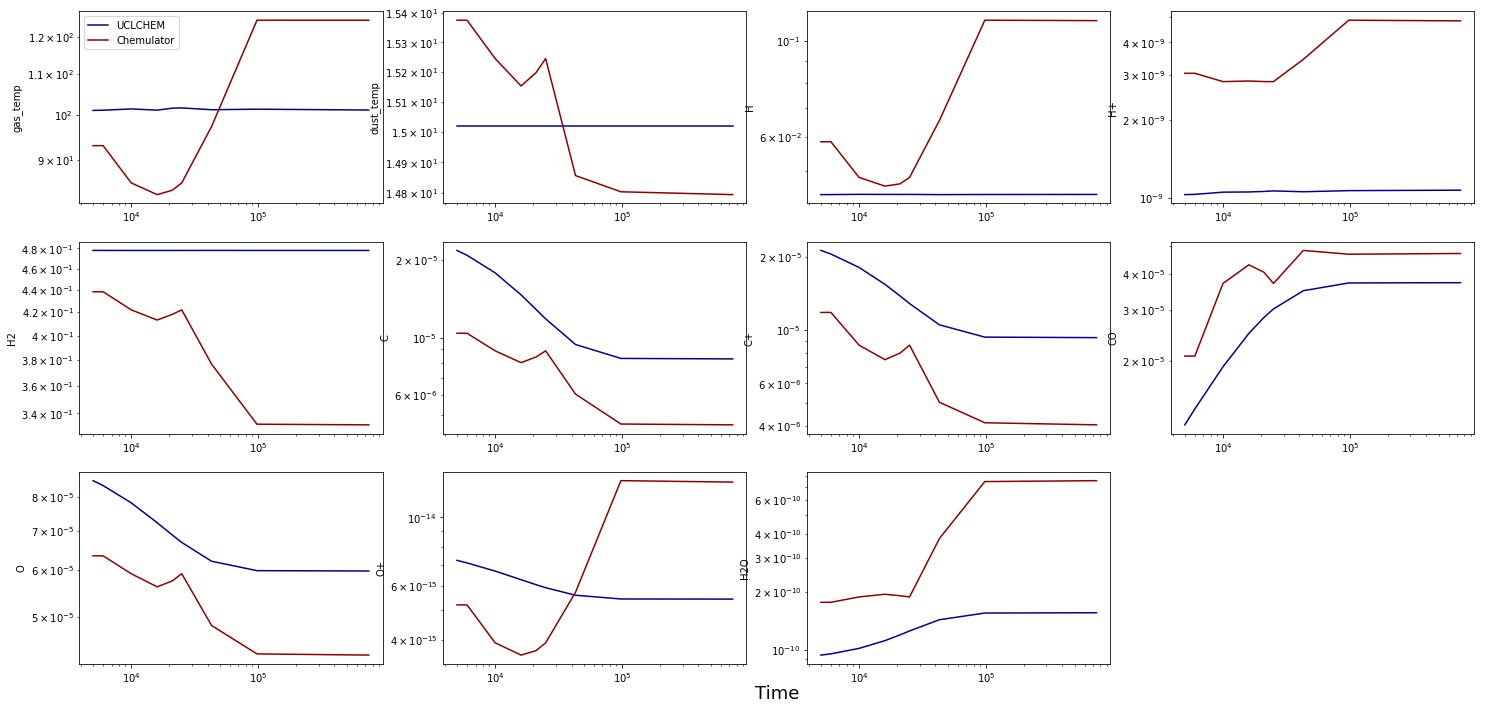

In [7]:
#now the one-vs-one plots
#first set-up the number of plots

m=9 #model

fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Time',size=18)
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
#All this is for put the time as common label

for i in range(11):
    ax1 = fig.add_subplot(3,4,i+1)
    ax1.plot(models_top[m]['Time'][1:],models_top[m][plot_specs[i]][1:],label='UCLCHEM', color='darkblue')
    ax1.plot(models_top[m]['Time'][1:],predicted_vals[m][plot_specs[i]],label='Chemulator', color='darkred')
    if i==0:ax1.legend()
    ax1.set(xscale="log",yscale="log",ylabel=plot_specs[i])

**Now lets plot the real vs predicted for every one of the models**

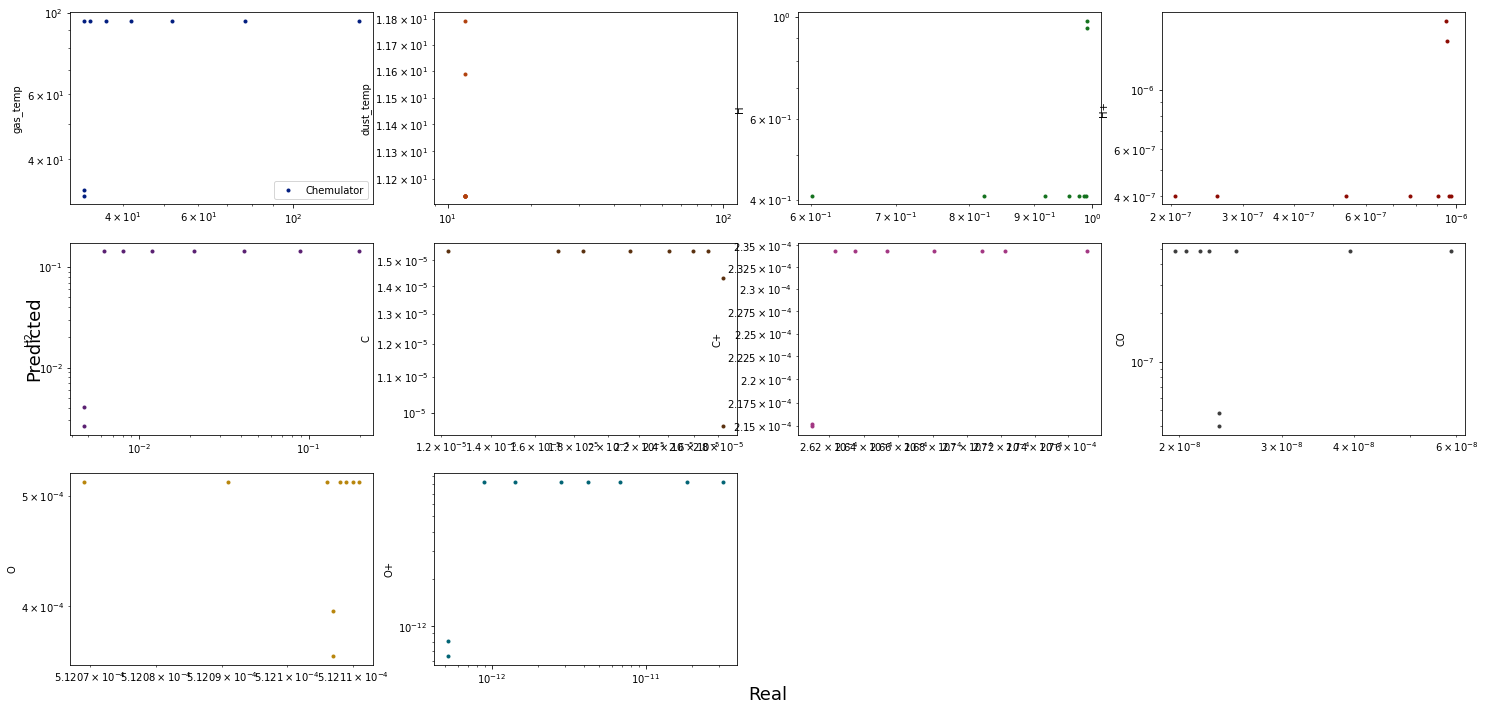

In [8]:
#fig = plt.figure()
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Real',size=18)
ax1.set_ylabel('Predicted',size=18)

ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)



#ax1 = fig.add_subplot(1,1,1)
colors=sns.color_palette("dark",n_colors=10)
#fig = plt.figure(figsize=(25,12))
for i in range(10):
    ax1 = fig.add_subplot(3,4,i+1)
    #ax1.plot(models_top[m]['Time'],models_top[m][plot_specs[i]],label='UCLCHEM', color='darkblue')
    #ax1.plot(models_top[m]['Time'][1:],predicted_vals[m][plot_specs[i]],label='Chemulator', color='darkred')
    ax1.plot(models_top[0][plot_specs[i]][1:],predicted_vals[0][plot_specs[i]],'.'
             ,label='Chemulator', color=colors[i])
    
    if i==0:ax1.legend()
    ax1.set(xscale="log",yscale="log",ylabel=plot_specs[i])

    ###ax1.plot(models_top[i][plot_specs[0]][1:],predicted_vals[i][plot_specs[0]],'.'
             #,label='Chemulator', color=colors[i])
    #ax1.set(xscale="log",yscale="log")#,xlabel="Time",ylabel=plot_specs[i])
    #ax1.plot(np.linspace(1e1,1e4,100),np.linspace(1e1,1e4,100))

Now let's plot the benchmarking of all models

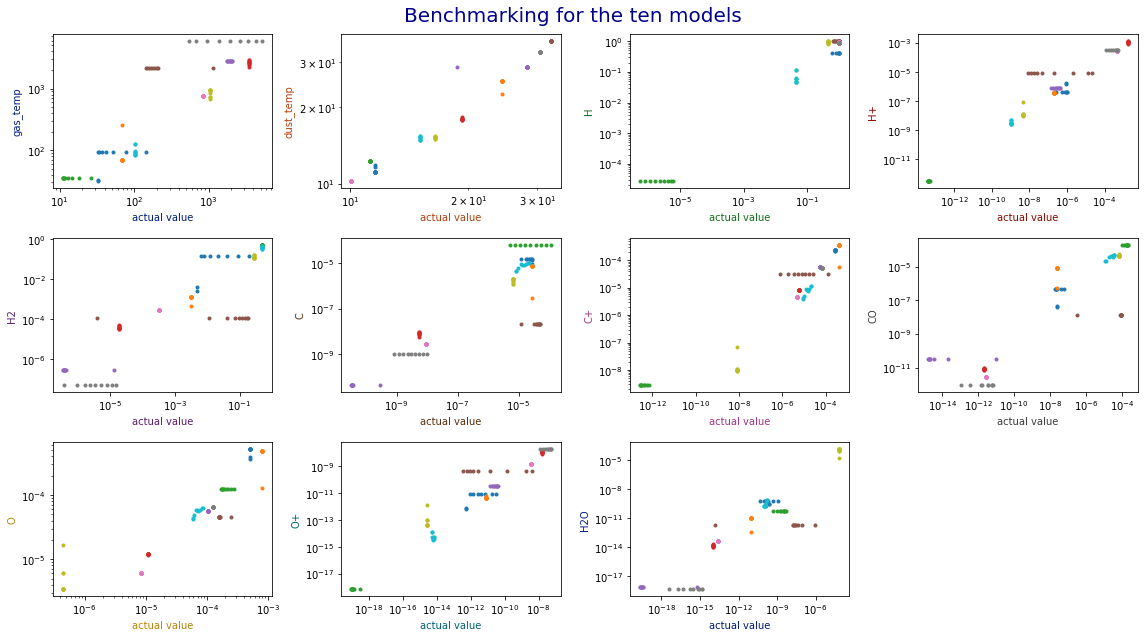

In [32]:
#fig,ax=plt.subplots(figsize=(25,12))
colors=sns.color_palette("dark",n_colors=11)
fig,axes=plt.subplots(3,4,tight_layout=True,figsize=(16,9))
axes=axes.flatten()

for j in range(len(predicted_vals)):
    for i,ax in enumerate(axes[:-1]):
        ax.plot(models_top[j][plot_specs[i]][1:],predicted_vals[j][plot_specs[i]],
                '.')#,label="UCLCHEM",color=colors[i])
        ax.set(xscale="log",yscale="log",xlabel="actual value",ylabel=plot_specs[i])
        ax.yaxis.label.set_color(colors[i])
        ax.xaxis.label.set_color(colors[i])
fig.suptitle('Benchmarking for the ten models', fontsize=20, color='darkblue')
#ax.legend()
axes[-1].remove()

Now lets take the median of every prediction range

In [33]:
#first we put al the prediction in one same dataframe
actuals=pd.concat(models_top, axis=0)
actuals=actuals.drop(index, axis=0)
predicted=pd.concat(predicted_vals, axis=0)
actuals['dust_temp']=pd.to_numeric(actuals['dust_temp'])

In [151]:
#Now, we take the median for ranges
actual_med=[]
pred_med=[]
dif=25

for spec in plot_specs:
    m=max(actuals[spec])
    mim=min(actuals[spec])
    
    M=max(predicted[spec])
    Mim=min(predicted[spec])
    
    p_ac=(m-mim)/dif
    p_pred=(M-Mim)/dif
    
    a_med=[]
    p_med=[]
    for p in range(int(dif)):
        a_med.append( actuals[spec][(actuals[spec] <= mim+(p+1)*p_ac)&((mim+p*p_ac) <= actuals[spec])].median() )
        p_med.append( predicted[spec][(predicted[spec] <= Mim+(p+1)*p_pred)&((Mim+p*p_pred) <= predicted[spec])].median() )
        #mim=mim+p_ac
        #Mim=Mim+p_pred
        
    actual_med.append(a_med)
    pred_med.append(p_med)

In [152]:
actual_med=np.array(actual_med)
pred_med=np.array(pred_med)
act_med=[]
pre_med=[]
for i in range(len(actual_med)):
    pr=[]
    ac=[]
    for j in range(int(dif)):
        if np.isnan(actual_med[i][j])==False and np.isnan(pred_med[i][j])==False:
            pr.append(pred_med[i][j])
            ac.append(actual_med[i][j])
    act_med.append(ac)
    pre_med.append(pr)
            #actual_med[i]=np.delete(actual_med[i], j, axis=1)
            #pred_med[i]=np.delete(pred_med[i], j, axis=1)

            
    

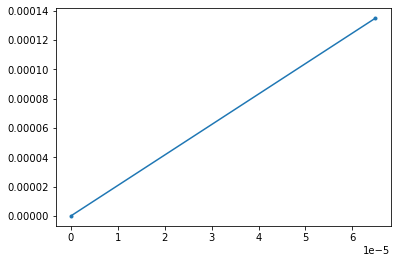

In [153]:
plt.plot( act_med[10],pre_med[10],'.-')

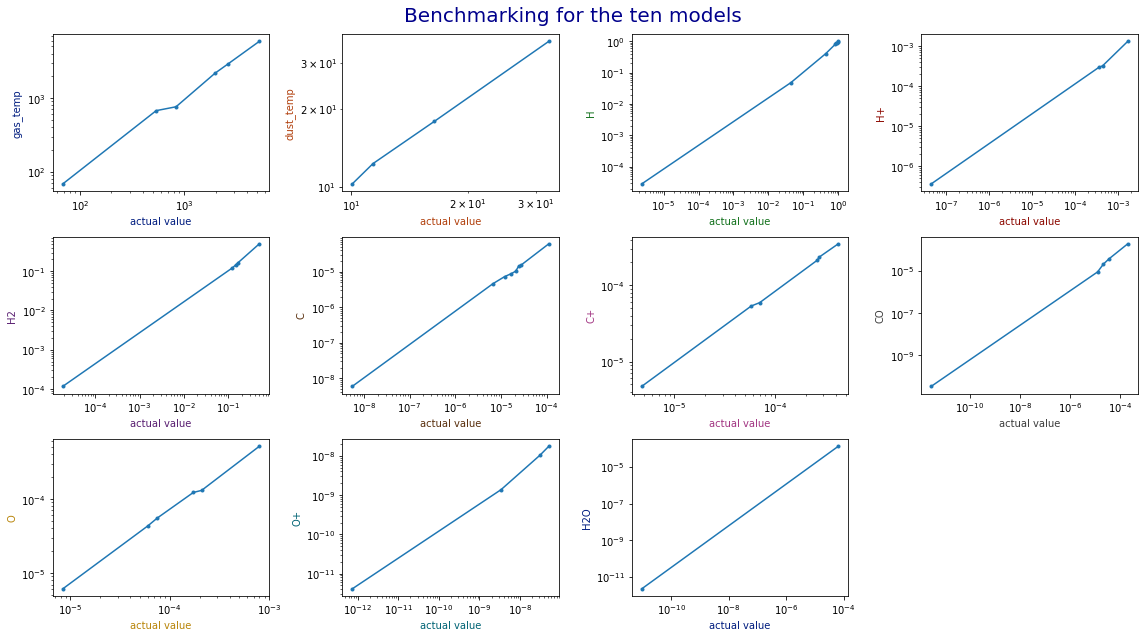

In [154]:
#fig,ax=plt.subplots(figsize=(25,12))
colors=sns.color_palette("dark",n_colors=11)
fig,axes=plt.subplots(3,4,tight_layout=True,figsize=(16,9))
axes=axes.flatten()


for i,ax in enumerate(axes[:-1]):
    ax.plot(act_med[i],pre_med[i],'.-')
    ax.set(xscale="log",yscale="log",xlabel="actual value",ylabel=plot_specs[i])
    ax.yaxis.label.set_color(colors[i])
    ax.xaxis.label.set_color(colors[i])
    ax.set(xscale="log",yscale="log",xlabel="actual value",ylabel=plot_specs[i])
fig.suptitle('Benchmarking for the ten models', fontsize=20, color='darkblue')
#ax.legend()
axes[-1].remove()

In [155]:
act_med[1]

[10.06, 11.39, 16.42, 32.47]

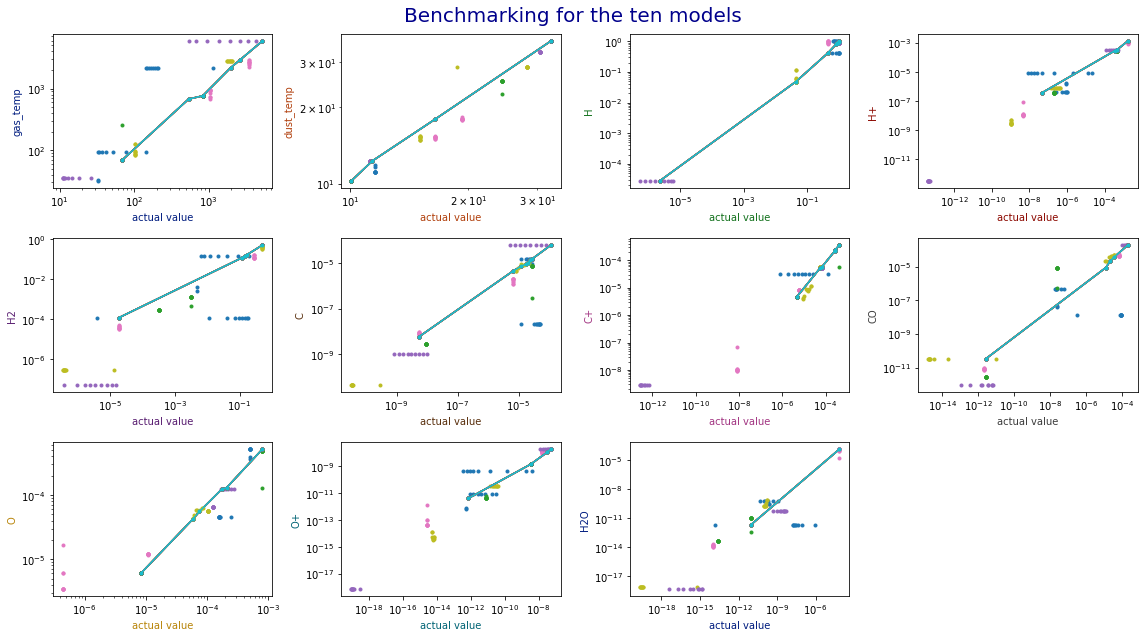

In [156]:
#fig,ax=plt.subplots(figsize=(25,12))
colors=sns.color_palette("dark",n_colors=11)
fig,axes=plt.subplots(3,4,tight_layout=True,figsize=(16,9))
axes=axes.flatten()

for j in range(len(predicted_vals)):
    for i,ax in enumerate(axes[:-1]):
        ax.plot(models_top[j][plot_specs[i]][1:],predicted_vals[j][plot_specs[i]],
                '.')#,label="UCLCHEM",color=colors[i])
        ax.plot(act_med[i],pre_med[i],'.-')
        ax.set(xscale="log",yscale="log",xlabel="actual value",ylabel=plot_specs[i])
        ax.yaxis.label.set_color(colors[i])
        ax.xaxis.label.set_color(colors[i])
fig.suptitle('Benchmarking for the ten models', fontsize=20, color='darkblue')
#ax.legend()
axes[-1].remove()

In [177]:
#####################
actual_med=[]
pred_med=[]
dif=1e5

for spec in plot_specs:
    m=max(actuals[spec])
    mim=min(actuals[spec])
    
    M=max(predicted[spec])
    Mim=min(predicted[spec])
    
    p_ac=(m-mim)/dif
    p_pred=(M-Mim)/dif
    
    a_med=[]
    p_med=[]
    for p in range(int(dif)):
        a_med.append( actuals[spec][(actuals[spec]<=mim+(p+1)*p_ac)&(mim+p*p_ac<=actuals[spec])].median() )
        p_med.append( predicted[spec][(predicted[spec]<=Mim+(p+1)*p_pred)&(Mim+p*p_pred<=predicted[spec])].median() )
        #mim=mim+p_ac
        #Mim=Mim+p_pred
        
    actual_med.append(a_med)
    pred_med.append(p_med)
########################

KeyboardInterrupt: 

In [237]:
dif=30
spec=plot_specs[10]

m=max(actuals[spec])
mim=min(actuals[spec])

M=max(predicted[spec])
Mim=min(predicted[spec])

p_ac=(m-mim)/dif
p_pred=(M-Mim)/dif

a_med=[]
p_med=[]
print('el minimo de los actuales es ',mim)
for p in range(int(dif)):
    print('p=',p)
    print('interval actuales es \n ',mim+p*p_ac, mim+(p+1)*p_ac)
    print('valores actuales en ese rango \n', actuals[spec][(mim+p*p_ac<=actuals[spec]
                                                            ) &  (actuals[spec]<=mim+(p+1)*p_ac)] )
    
    
    #a_med.append( actuals[spec][(actuals[spec]<=mim+(p+1)*p_ac)&(mim+p*p_ac<=actuals[spec])].median() )
    #p_med.append( predicted[spec][(predicted[spec]<=Mim+(p+1)*p_pred)&(Mim+p*p_pred<=predicted[spec])].median() )
    #mim=mim+p_ac
    #Mim=Mim+p_pred

#actual_med.append(a_med)
#pred_med.append(p_med)


el minimo de los actuales es  2.13298e-20
p= 0
interval actuales es 
  2.13298e-20 2.1633800000000205e-06
valores actuales en ese rango 
 1       4.628850e-10
2       1.064840e-09
3       1.052770e-10
4       4.730760e-11
5       9.605050e-11
            ...     
9022    1.196290e-10
9026    1.254270e-10
9044    1.433770e-10
9099    1.552860e-10
9746    1.558290e-10
Name: H2O, Length: 81, dtype: float64
p= 1
interval actuales es 
  2.1633800000000205e-06 4.32676000000002e-06
valores actuales en ese rango 
 Series([], Name: H2O, dtype: float64)
p= 2
interval actuales es 
  4.32676000000002e-06 6.49014000000002e-06
valores actuales en ese rango 
 Series([], Name: H2O, dtype: float64)
p= 3
interval actuales es 
  6.49014000000002e-06 8.65352000000002e-06
valores actuales en ese rango 
 Series([], Name: H2O, dtype: float64)
p= 4
interval actuales es 
  8.65352000000002e-06 1.0816900000000018e-05
valores actuales en ese rango 
 Series([], Name: H2O, dtype: float64)
p= 5
interval actuales es

In [233]:
for h in [1,2,3,4,5]:
    if 2<=h: print(h)

2
3
4
5


In [212]:
a_med

[9.45733e-12,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 6.489460000000001e-05]

In [200]:
p_med

[2.187848860413233e-12,
 nan,
 nan,
 1.5868392438278534e-05,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 9.811759809963405e-05,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.00013497543113771826]

In [201]:
q=[]
w=[]
p_med=np.array(p_med)
a_med=np.array(a_med)
for i in range(int(dif)):
    if np.isnan(p_med[i])==False and np.isnan(a_med[i])==False:
        q.append(p_med[i])
        w.append(a_med[i])
        

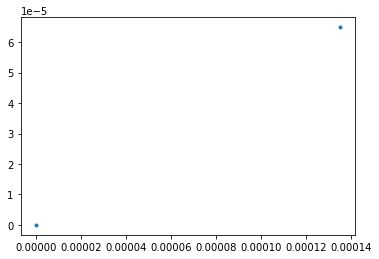

In [202]:
plt.plot(q,w,'.')

In [187]:
q

[2.187848860413233e-12, 0.00013580491940956563]

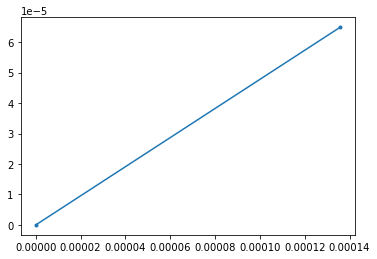

In [188]:
plt.plot(q,w,'.-')

In [ ]:
M